#  Автоэнкодеры

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.eecs.qmul.ac.uk/~sgg/_ECS795P_/papers/WK07-8_PyTorch_Tutorial2.html
* https://www.youtube.com/watch?v=zp8clK9yCro
* https://medium.com/@rekalantar/variational-auto-encoder-vae-pytorch-tutorial-dce2d2fe0f5f
* https://towardsdatascience.com/conditional-variational-autoencoders-with-learnable-conditional-embeddings-e22ee5359a2a
* https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#sphx-glr-auto-examples-others-plot-visualization-utils-py

## Задачи для совместного разбора

1\. Обсудите основные шаги в обучении автокодировщиков.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите набор данных MNIST из пакета `torchvision` (данный набор уже разбит на обучающее и тестовое множество).

Создайте и обучите модель автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция вида
$z = f_\theta(x)$
,где $\theta$ - это параметры кодировщика.

Декодировщик - это функция вида
$\hat{x} = g_\phi(z)$
,где $\phi$ - это параметры декодировщика.

В нашем случае оба компонента представляют собой нейронные сети. Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду.

В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.

Обратите внимание, что во время обучения метки классов не используются.


- [ ] Проверено на семинаре

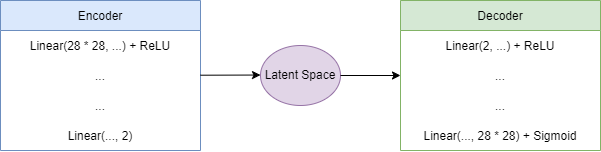

In [9]:
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch as th
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

mnist_train = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transform)
mnist_train, mnist_test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data/mnist
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data/mnist
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 14*14),
            nn.ReLU(),
            nn.Linear(14*14, 7*7),
            nn.ReLU(),
            nn.Linear(7*7, 2)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(2, 7*7),
            nn.ReLU(),
            nn.Linear(7*7, 14*14),
            nn.ReLU(),
            nn.Linear(14*14, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
model = Autoencoder().cuda()
optimizer = optimizer = optim.AdamW(model.parameters(), lr=2e-3)
criterion = nn.MSELoss()

train_loader = DataLoader(mnist_train, batch_size=8, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=8, shuffle=True)

In [ ]:
for epoch in range(10):
    model.train()
    train_loss = 0
    for img, _ in tqdm(train_loader):
        img = img.flatten(start_dim=1).cuda()
    
        output = model(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    model.eval()
    test_loss = 0.0
    with th.no_grad():
        for img, _ in tqdm(test_loader):
            img = img.flatten(start_dim=1).cuda()

            outputs = model(img)
            loss = criterion(outputs, img)
        
            test_loss += loss.item()
        
    train_loss /= len(train_loader)
    test_loss /= len(test_loader)
    
    print(f"Epoch [{epoch+1}/10], Train Loss: {train_loss:.4f} Test Loss: {test_loss:.4f}")

100%|██████████| 1250/1250 [00:00<00:00, 1307.53it/s]


Epoch [1/10], Train Loss: 0.0458 Test Loss: 0.0422


100%|██████████| 1250/1250 [00:00<00:00, 1351.35it/s]


Epoch [2/10], Train Loss: 0.0407 Test Loss: 0.0402


100%|██████████| 1250/1250 [00:00<00:00, 1372.12it/s]


Epoch [3/10], Train Loss: 0.0396 Test Loss: 0.0392


100%|██████████| 1250/1250 [00:00<00:00, 1344.09it/s]


Epoch [4/10], Train Loss: 0.0389 Test Loss: 0.0387


100%|██████████| 1250/1250 [00:00<00:00, 1352.81it/s]


Epoch [5/10], Train Loss: 0.0387 Test Loss: 0.0386


100%|██████████| 1250/1250 [00:00<00:00, 1395.09it/s]


Epoch [6/10], Train Loss: 0.0384 Test Loss: 0.0385


100%|██████████| 1250/1250 [00:00<00:00, 1319.96it/s]


Epoch [7/10], Train Loss: 0.0386 Test Loss: 0.0389


100%|██████████| 1250/1250 [00:00<00:00, 1378.17it/s]


Epoch [8/10], Train Loss: 0.0384 Test Loss: 0.0386


100%|██████████| 1250/1250 [00:00<00:00, 1366.12it/s]


Epoch [9/10], Train Loss: 0.0381 Test Loss: 0.0379


100%|██████████| 1250/1250 [00:00<00:00, 1310.27it/s]

Epoch [10/10], Train Loss: 0.0380 Test Loss: 0.0381


<p class="task" id="2"></p>

2\. Получите один батч из тестового множества. Используя модель, обученную в предыдущем задании, получите скрытые представления для всех изображений из этого батча и визуализируйте на плоскости (они должны иметь размерность 2!). Раскрасьте точки в цвета, соответствующие меткам класса изображений (цифрам).

Возьмите одно изображение из тестового множества и пропустите его через обученный автокодировщик. Визуализируйте рядом (по горизонтали) два изображения: исходное и после восстановления автокодировщиком.


- [ ] Проверено на семинаре

In [ ]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

images = images.flatten(start_dim=1).cuda() 
labels = labels.cuda()

with th.no_grad(): 
    encoder = model.encoder 
    hidden_representations = encoder(images)
    
hidden_representations = hidden_representations.cpu().numpy()
hidden_representations

array([[  0.80502725,   0.5610369 ],
       [ -0.20544378,   1.3800577 ],
       [  0.30203283,   2.0160959 ],
       [-31.87642   ,  -2.7482896 ],
       [  2.8064437 ,  -0.84504455],
       [ -8.852682  ,   0.47577867],
       [ -3.2408226 ,  -4.601922  ],
       [  5.52603   ,  -2.1028206 ]], dtype=float32)

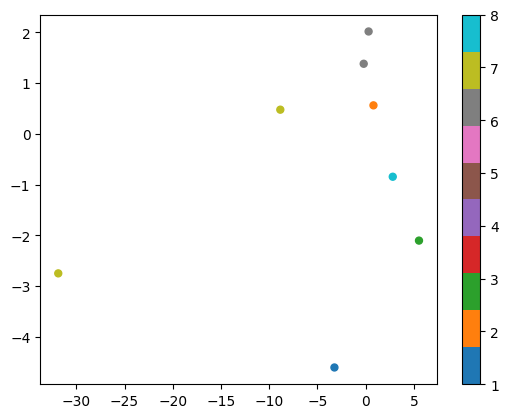

In [ ]:
plt.scatter(hidden_representations[:, 0], hidden_representations[:, 1], c=labels.cpu(), cmap='tab10', s=25)
plt.colorbar() 
plt.show()

In [ ]:
image = images[5]
with th.no_grad(): 
    reconstructed = model(image)
    
reconstructed  = reconstructed.cpu().numpy().reshape((28, 28))
image = image.cpu().numpy().reshape((28, 28))
reconstructed.shape

(28, 28)

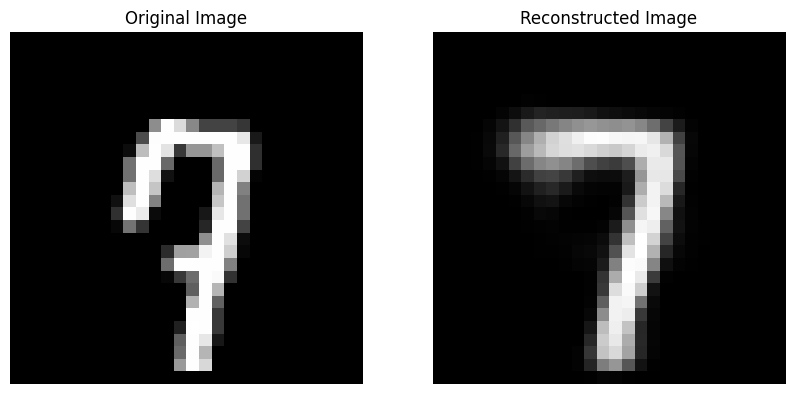

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')  
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(reconstructed, cmap='gray')  
axes[1].set_title("Reconstructed Image")
axes[1].axis('off')

plt.show()

<p class="task" id="3"></p>

3\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и пропускать его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [ ]:
def make_some_noise():
    tensor = th.randn(2).cuda()
    with th.no_grad():  
        decoder = model.decoder 
        generated = decoder(tensor)
    return generated

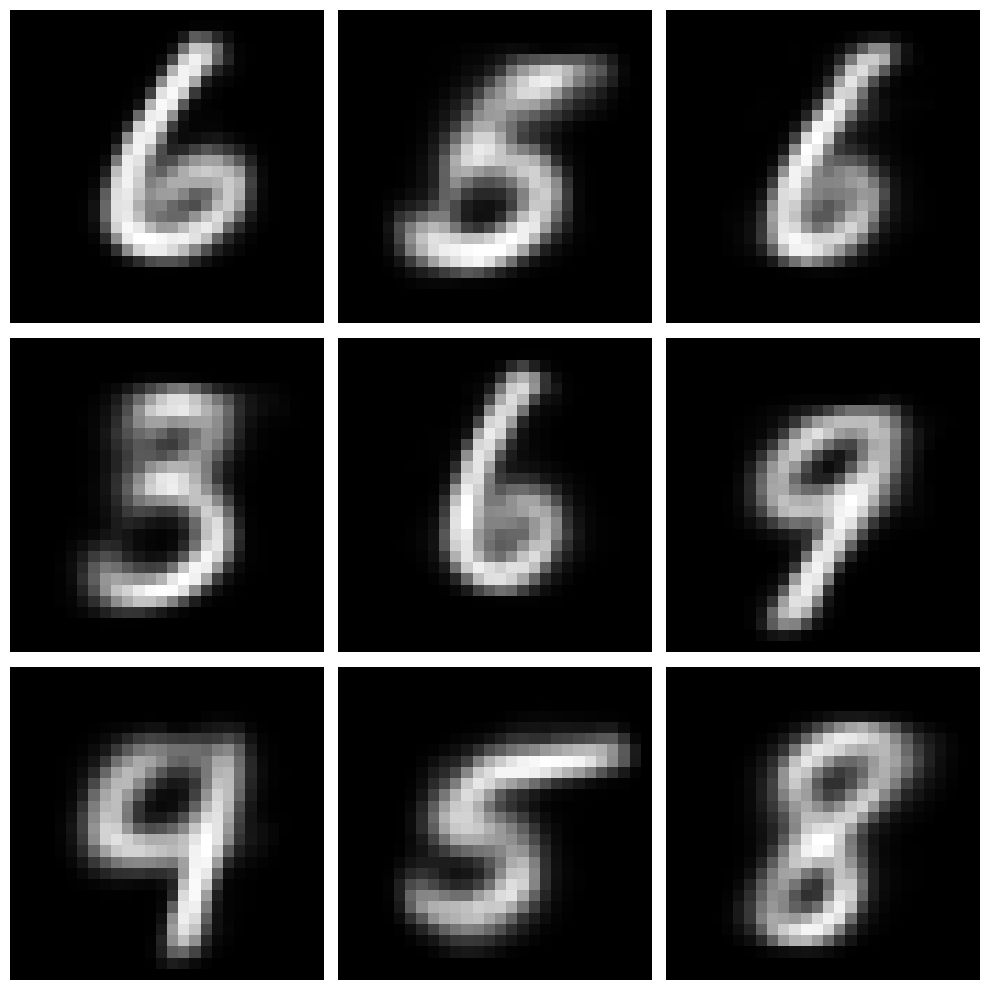

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    image = make_some_noise()
    image = image.cpu().numpy().reshape((28, 28))
    axes[i].imshow(image, cmap='gray') 
    axes[i].axis('off') 

plt.tight_layout()  
plt.show()

<p class="task" id="4"></p>

4\. Создайте и обучите модель условного автокодировщика, используя только полносвязные слои и функции активации.

Отличие от предыдущего варианта заключается в том, что теперь функции кодировщика и декодировщика принимают на вход также метку класса:
$$z = f_\theta(x, c)$$
$$\hat{x} = g_\phi(z, c)$$

Таким образом, теперь во теперь время обучения метки классов используются. Задействуйте их следующим образом: представьте метки классов в виде one-hot кодировки и объедините с пикселями изображения (для этого адаптируйте размерность слоев).

Скрытое представление, полученное после части-кодировщика, должно иметь размерность 2. Последним слоем части-декодеровщика сделайте сигмоиду. В качестве функции потерь используйте `MSELoss` между исходным и восстановленным изображением $MSE(x, \hat{x})$.


- [ ] Проверено на семинаре

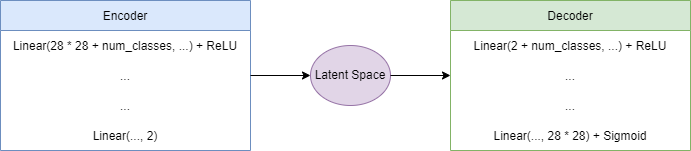

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28 + 10, 14*14),
            nn.ReLU(),
            nn.Linear(14*14, 7*7),
            nn.ReLU(),
            nn.Linear(7*7, 2)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(2 + 10, 7*7),
            nn.ReLU(),
            nn.Linear(7*7, 14*14),
            nn.ReLU(),
            nn.Linear(14*14, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Autoencoder().cuda()
optimizer = optimizer = optim.AdamW(model.parameters(), lr=2e-3)
criterion = nn.MSELoss()

train_loader = DataLoader(mnist_train, batch_size=8, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=8, shuffle=True)

In [ ]:
for epoch in range(10):
    model.train()
    train_loss = 0
    for img, labels in tqdm(train_loader):
        img = img.flatten(start_dim=1).cuda()
        labels = labels.cuda()
        one_hot_labels = F.one_hot(labels, num_classes=10).float()
        x = th.cat((img.reshape((8, 28*28)), one_hot_labels), dim=1)
        
        x = model.encoder(x)
        x = th.cat((x, one_hot_labels), dim=1)
        x = model.decoder(x)
        loss = criterion(x, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    model.eval()
    test_loss = 0.0
    with th.no_grad():
        for img, labels in tqdm(test_loader):
            img = img.flatten(start_dim=1).cuda()
            labels = labels.cuda()
            one_hot_labels = F.one_hot(labels, num_classes=10).float()
            x = th.cat((img.reshape((8, 28*28)), one_hot_labels), dim=1)
            
            x = model.encoder(x)
            x = th.cat((x, one_hot_labels), dim=1)
            x = model.decoder(x)
            loss = criterion(x, img)
        
            test_loss += loss.item()
        
    train_loss /= len(train_loader)
    test_loss /= len(test_loader)
    
    print(f"Epoch [{epoch+1}/10], Train Loss: {train_loss:.4f} Test Loss: {test_loss:.4f}")

100%|██████████| 1250/1250 [00:01<00:00, 1166.05it/s]


Epoch [1/10], Train Loss: 0.0361 Test Loss: 0.0345


100%|██████████| 1250/1250 [00:01<00:00, 1204.24it/s]


Epoch [2/10], Train Loss: 0.0342 Test Loss: 0.0339


100%|██████████| 1250/1250 [00:01<00:00, 1197.32it/s]


Epoch [3/10], Train Loss: 0.0336 Test Loss: 0.0339


100%|██████████| 1250/1250 [00:01<00:00, 1133.27it/s]


Epoch [4/10], Train Loss: 0.0333 Test Loss: 0.0334


100%|██████████| 1250/1250 [00:01<00:00, 1218.33it/s]


Epoch [5/10], Train Loss: 0.0331 Test Loss: 0.0331


100%|██████████| 1250/1250 [00:01<00:00, 1231.52it/s]


Epoch [6/10], Train Loss: 0.0329 Test Loss: 0.0331


100%|██████████| 1250/1250 [00:01<00:00, 1179.24it/s]


Epoch [7/10], Train Loss: 0.0328 Test Loss: 0.0330


100%|██████████| 1250/1250 [00:01<00:00, 1168.23it/s]


Epoch [8/10], Train Loss: 0.0327 Test Loss: 0.0332


100%|██████████| 1250/1250 [00:01<00:00, 1221.90it/s]


Epoch [9/10], Train Loss: 0.0326 Test Loss: 0.0328


100%|██████████| 1250/1250 [00:01<00:00, 1131.22it/s]

Epoch [10/10], Train Loss: 0.0326 Test Loss: 0.0328


<p class="task" id="5"></p>

5\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения и one-hot представление цифры. Далее объединенный вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [ ]:
labels = th.zeros(10).cuda()
labels[5] = 1
labels

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
def make_some_noise():
    tensor = th.randn(2).cuda()
    tensor = th.cat((tensor, labels), dim=0)
    
    with th.no_grad():  
        decoder = model.decoder 
        generated = decoder(tensor)
    return generated

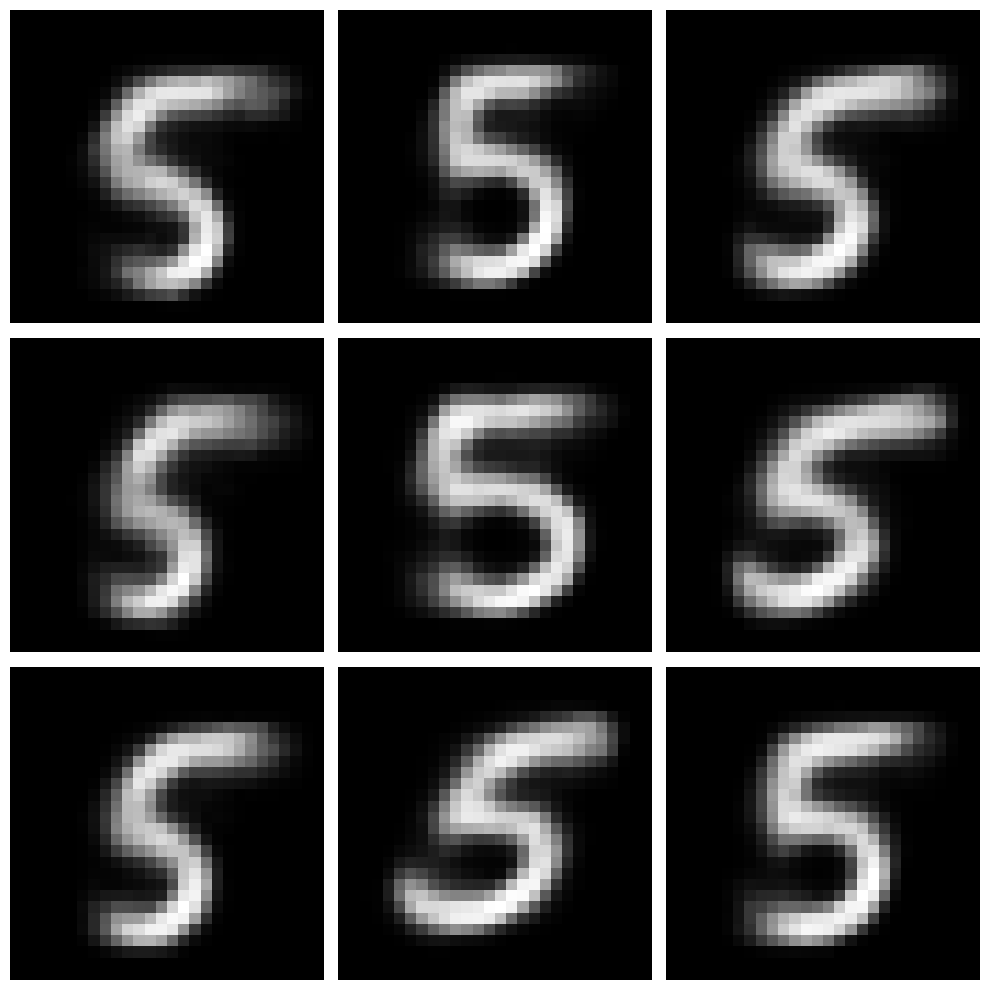

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    image = make_some_noise()
    image = image.cpu().numpy().reshape((28, 28))
    axes[i].imshow(image, cmap='gray') 
    axes[i].axis('off') 

plt.tight_layout()  
plt.show()

<p class="task" id="6"></p>

6\. Создайте и обучите модель вариационного автокодировщика, используя только полносвязные слои и функции активации.

Кодировщик - это функция следующего вида:
$$q_\phi(z|x) = \mathcal{N}(\mu_\phi(x), \sigma_\phi^2(x))$$

Здесь $\phi$ - параметры кодировщика, а $\mu_\phi(x)$ и $\sigma_\phi^2(x)$ - это обучаемые функции (в нашем случае - полносвязные слои).

Чтобы иметь возможность обучить такую модель, используется т.н. reparametrization trick: на основе функций $\mu$ и $ \sigma$ считаем значение:

$$z = \mu_\phi(x) + \sigma_\phi(x) \odot \epsilon, \quad \epsilon \sim \mathcal{N}(0, I)$$

Декодировщик пытается восстановить исходное изображение из полученного вектора:

$$p_\theta(x|z) = f(z; \theta)$$

В качестве функции потерь обычно используется следующая:
$$\mathcal{L}_{total} = \mathcal{L}_{recon} + D_{KL}$$
$$\mathcal{L}_{recon} = -\sum_{i=1}^D [x_i \log \hat{x}_i + (1 - x_i) \log (1 - \hat{x}_i)]$$
$$D_{KL} = -\frac{1}{2} \sum_{j=1}^J (1 + \log \sigma_j^2 - \mu_j^2 - \sigma_j^2)$$


- [ ] Проверено на семинаре

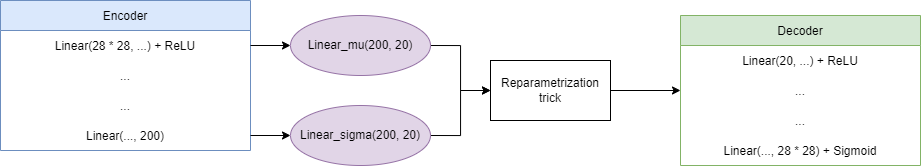

In [22]:
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 22*22),
            nn.ReLU(),
            nn.Linear(22*22, 16*16),
            nn.ReLU(),
            nn.Linear(16*16, 200)
        )

        self.mu = nn.Linear(200, 20)
        self.logvar = nn.Linear(200, 20)
        
        self.decoder = nn.Sequential(
            nn.Linear(20, 7*7),
            nn.ReLU(),
            nn.Linear(7*7, 14*14),
            nn.ReLU(),
            nn.Linear(14*14, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        mu = self.mu(x)
        logvar = self.logvar(x)
        
        std = th.exp(0.5 * logvar)
        eps = th.randn_like(std)
        z = mu + eps * std

        recon = self.decoder(z)

        return recon, mu, logvar

In [23]:
def loss_function(recon, x, mu, logvar):
    recon_loss = th.nn.functional.binary_cross_entropy(recon, x, reduction='mean')
    
    kl_loss = -0.5 * th.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    total_loss = recon_loss + kl_loss
    return total_loss

In [24]:
model = VAE().cuda()
optimizer = optim.AdamW(model.parameters(), lr=2e-4)

train_loader = DataLoader(mnist_train, batch_size=8, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=8, shuffle=True)

In [15]:
for epoch in range(10):
    model.train()
    train_loss = 0
    for img, _ in tqdm(train_loader):
        img = img.flatten(start_dim=1).cuda()
    
        recon, mu, sigma = model(img)
        loss = loss_function(recon, img, mu, sigma)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
    model.eval()
    test_loss = 0.0
    with th.no_grad():
        for img, _ in tqdm(test_loader):
            img = img.flatten(start_dim=1).cuda()

            recon, mu, sigma = model(img)
            loss = loss_function(recon, img, mu, sigma)
        
            test_loss += loss.item()
        
    train_loss /= len(train_loader)
    test_loss /= len(test_loader)
    
    print(f"Epoch [{epoch+1}/10], Train Loss: {train_loss:.4f} Test Loss: {test_loss:.4f}")

100%|██████████| 1250/1250 [00:00<00:00, 1788.26it/s]


Epoch [1/10], Train Loss: 1371.6326 Test Loss: 1148.1283


100%|██████████| 1250/1250 [00:00<00:00, 1907.70it/s]


Epoch [2/10], Train Loss: 1085.2544 Test Loss: 1020.9696


100%|██████████| 1250/1250 [00:00<00:00, 1780.39it/s]


Epoch [3/10], Train Loss: 997.9833 Test Loss: 960.1594


100%|██████████| 1250/1250 [00:00<00:00, 1697.59it/s]


Epoch [4/10], Train Loss: 955.6535 Test Loss: 934.9564


100%|██████████| 1250/1250 [00:00<00:00, 1760.25it/s]


Epoch [5/10], Train Loss: 930.6274 Test Loss: 912.6549


100%|██████████| 1250/1250 [00:00<00:00, 1769.45it/s]


Epoch [6/10], Train Loss: 914.2320 Test Loss: 899.5244


100%|██████████| 1250/1250 [00:00<00:00, 1802.50it/s]


Epoch [7/10], Train Loss: 902.0214 Test Loss: 891.2129


100%|██████████| 1250/1250 [00:00<00:00, 1728.96it/s]


Epoch [8/10], Train Loss: 892.8005 Test Loss: 883.5440


100%|██████████| 1250/1250 [00:00<00:00, 1717.71it/s]


Epoch [9/10], Train Loss: 884.9996 Test Loss: 877.4284


100%|██████████| 1250/1250 [00:00<00:00, 1715.58it/s]

Epoch [10/10], Train Loss: 878.5562 Test Loss: 870.2146


<p class="task" id="7"></p>

7\. Напишите функцию для генерации изображения на основе случайного шума. Функция должна генерировать случайный шум из стандартного нормального распределения. Далее вектор пропускается его через часть-декодировщик. Сгенерируйте несколько изображений и визуализируйте в виде сетки из картинок.

- [ ] Проверено на семинаре

In [26]:
def make_some_noise():
    tensor= th.randn(20).cuda()
    with th.no_grad():  
        generated = model.decoder(tensor)
    return generated

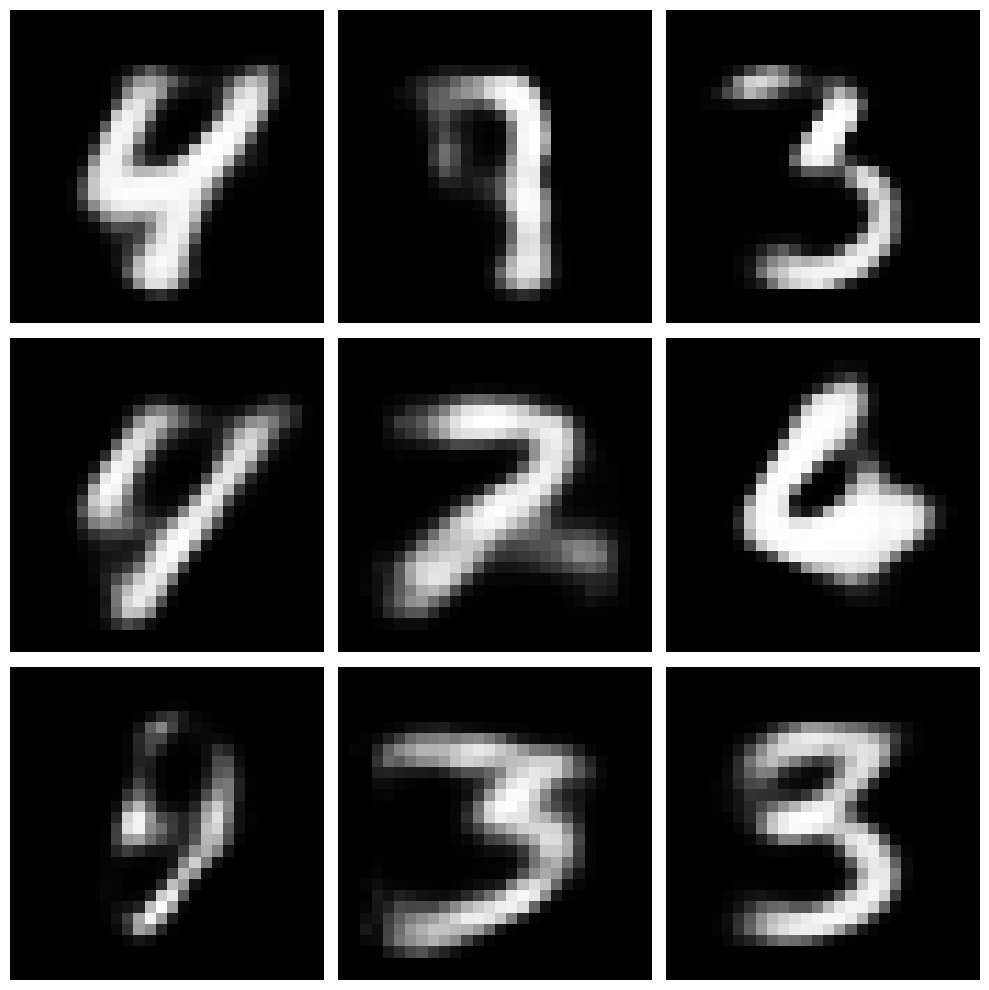

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    image = make_some_noise()
    image = image.cpu().numpy().reshape((28, 28))
    axes[i].imshow(image, cmap='gray') 
    axes[i].axis('off') 

plt.tight_layout()  
plt.show()